In [30]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('/home/admin1/Downloads/machine_learning/task_for_clustering/datasets/Datasets/Radius-Queries.csv', header = None)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
0    50000 non-null float64
1    50000 non-null float64
2    50000 non-null float64
dtypes: float64(3)
memory usage: 1.1 MB


In [33]:
data.head()

,0,1,2
0,0.090028,-0.016171,0.351216
1,0.326260,-0.000570,0.379557
2,0.046913,-0.054294,0.292925
3,0.079560,-0.029849,0.416946
4,0.111846,-0.092659,0.349373


In [34]:
data.describe()

,0,1,2
count,50000.000000,50000.000000,50000.000000
mean,0.180156,-0.062978,0.379064
std,0.124295,0.047916,0.099861
min,-0.002056,-0.179064,-0.058307
25%,0.088610,-0.090412,0.311977
50%,0.109007,-0.058997,0.378856
75%,0.325008,-0.018977,0.446788
max,0.373041,0.025835,0.797754


In [35]:
data.shape

(50000, 3)

In [36]:
data.columns = ['X_coordinate', 'Y_coordinate', 'Radius']

In [37]:
data.head()

,X_coordinate,Y_coordinate,Radius
0,0.090028,-0.016171,0.351216
1,0.326260,-0.000570,0.379557
2,0.046913,-0.054294,0.292925
3,0.079560,-0.029849,0.416946
4,0.111846,-0.092659,0.349373


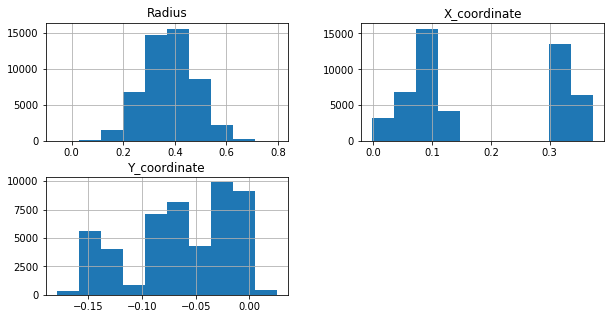

In [38]:
fig, ax = plt.subplots(figsize = (10, 5))
data.hist(ax = ax)
plt.show()

(3.0, 0.0)

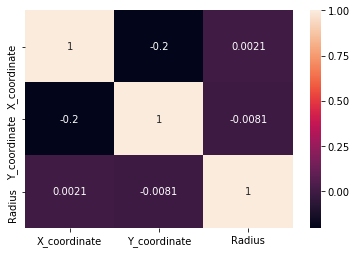

In [40]:
cor = data.corr()
ax = sb.heatmap(cor, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

we can see that all the columns have very low correlation with each other but out of that column Radius has the least correlation

Dropping the column Radius

In [41]:
data.drop(['Radius'], axis = 1, inplace = True)

In [42]:
train_radius_queries = data.sample(frac = 0.2, random_state = 0)

In [43]:
train_radius_queries.shape

(10000, 2)

Clustering the crimes based on x coordinate, y coordinate and radius of the loaction to investigate number of crime incidents, the total arrests and the average beat of the disc region for the Radius Queries dataset 

# Applying Kmeans on the Radius-Queries dataset

In [44]:
wcss = [ ]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(train_radius_queries.values)
    wcss.append(km.inertia_)

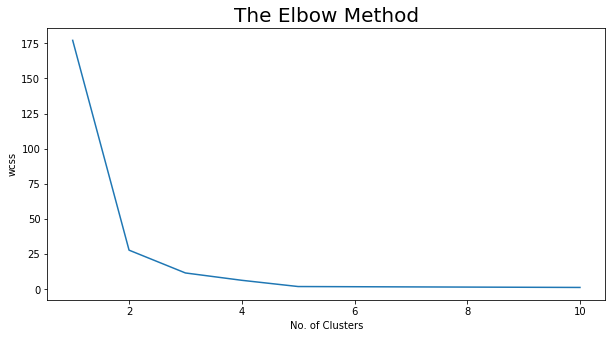

In [45]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [46]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(train_radius_queries.values)

In [47]:
y_means

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

Visualising the Clusters

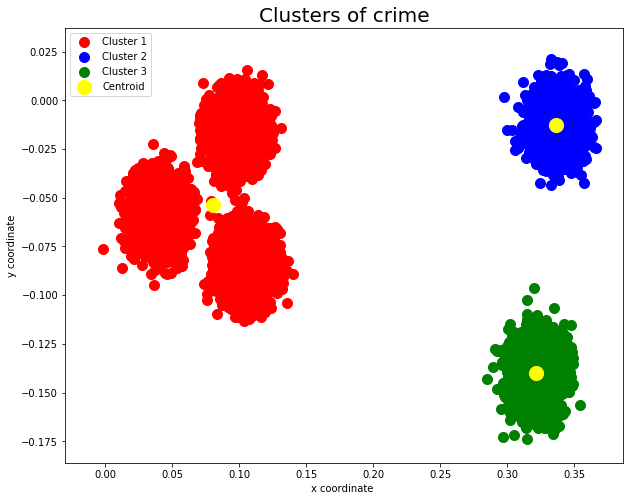

In [49]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(train_radius_queries.values[y_means == 0, 0], train_radius_queries.values[y_means == 0,1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(train_radius_queries.values[y_means == 1, 0], train_radius_queries.values[y_means == 1,1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(train_radius_queries.values[y_means == 2, 0], train_radius_queries.values[y_means == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroid')

plt.legend()

plt.title('Clusters of crime', size = 20)

plt.xlabel('x coordinate ')

plt.ylabel('y coordinate')

plt.show()

# Applying Hierarchical Clustering on Radius Queries Dataset

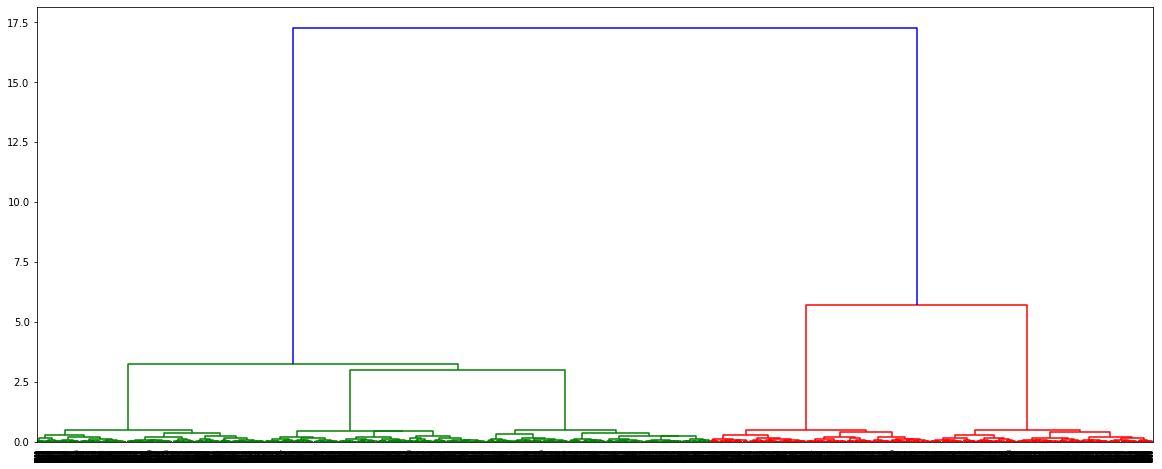

In [50]:
fig, ax = plt.subplots(figsize = (20,8))
dendrogram(linkage(train_radius_queries,'ward'))
plt.show()

In [51]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(train_radius_queries.values)

In [52]:
y_hc

array([1, 0, 1, ..., 1, 1, 1])

# Radius Queries Count Dataset

In [54]:
df = pd.read_csv('/home/admin1/Downloads/machine_learning/task_for_clustering/datasets/Datasets/Radius-Queries-Count.csv',header = None)

In [55]:
df.head()

,0,1,2,3
0,0.170446,0.251765,0.104563,251
1,0.161183,0.122247,0.109897,408
2,0.097526,0.124123,0.100691,468
3,0.077274,0.232118,0.103934,53
4,0.079819,0.240690,0.104495,48


In [56]:
df.describe()

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.114685,0.175794,0.105030,264.833400
std,0.040878,0.054179,0.002880,130.109685
min,0.029784,0.074242,0.100001,2.000000
25%,0.080251,0.132728,0.102554,229.000000
50%,0.095697,0.151403,0.105073,277.000000
75%,0.157830,0.234690,0.107535,351.000000
max,0.201790,0.277662,0.109999,695.000000


In [57]:
df.shape

(10000, 4)

In [58]:
df.columns = ['X_coordinate', 'Y_coordinate', 'Radius', 'Count']

In [59]:
df.head()

,X_coordinate,Y_coordinate,Radius,Count
0,0.170446,0.251765,0.104563,251
1,0.161183,0.122247,0.109897,408
2,0.097526,0.124123,0.100691,468
3,0.077274,0.232118,0.103934,53
4,0.079819,0.240690,0.104495,48


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
X_coordinate    10000 non-null float64
Y_coordinate    10000 non-null float64
Radius          10000 non-null float64
Count           10000 non-null int64
dtypes: float64(3), int64(1)
memory usage: 312.6 KB


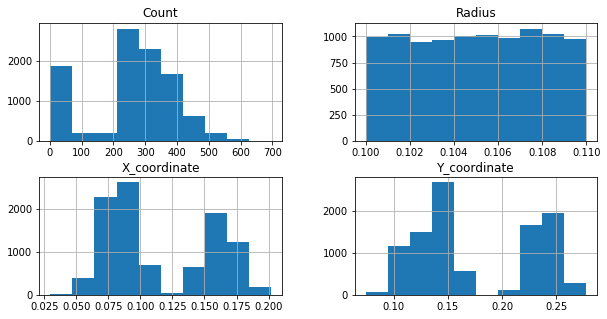

In [61]:
fig, ax = plt.subplots(figsize = (10, 5))
df.hist(ax = ax)
plt.show()

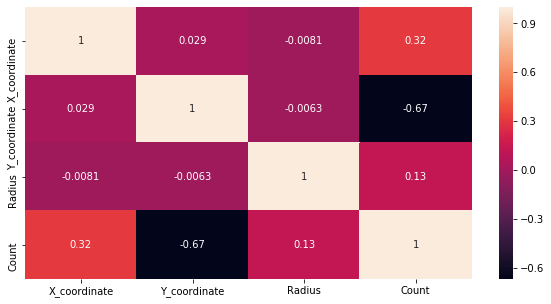

In [64]:
fig, ax = plt.subplots(figsize = (10, 5))
cor = df.corr()
ax = sb.heatmap(cor, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Clustering the crimes based on x coordinate, y coordinate, radius of the location and number of crime incidents  

# Applying Kmeans Clustering on Radius Queries Count Dataset

In [26]:
wcss = [ ]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df.values)
    wcss.append(km.inertia_)

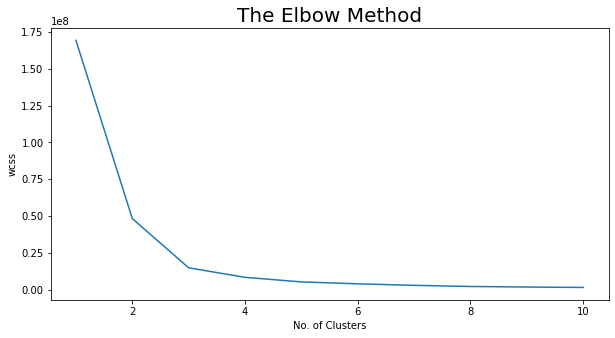

In [27]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
km_df = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means_df = km_df.fit_predict(df.values)

In [29]:
y_means_df

array([2, 1, 1, ..., 1, 1, 2], dtype=int32)

# Applying Hierarchical Clustering on Radius Queries Count Dataset

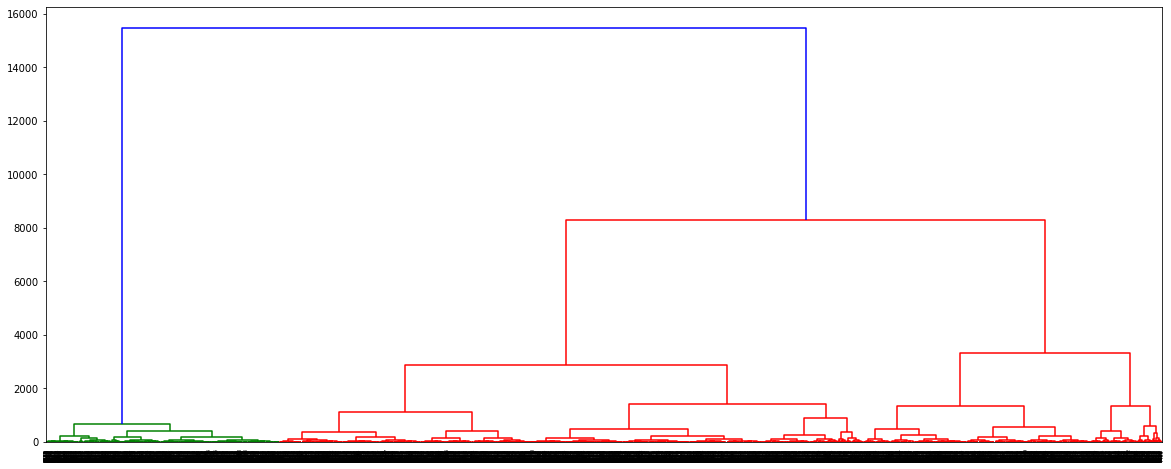

In [30]:
fig, ax = plt.subplots(figsize = (20,8))
dendrogram(linkage(df,'ward'))
plt.show()

In [31]:
hc_df = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc_df = hc_df.fit_predict(df.values)

Clustering the crimes based on x, y coordinate, number of crime incidents, x range, y range, sum of arrests

# Range Queries Aggregates Dataset

In [65]:
dt = pd.read_csv('/home/admin1/Downloads/machine_learning/task_for_clustering/datasets/Datasets/Range-Queries-Aggregates.csv')

In [66]:
dt.head()

,Unnamed: 0,x,y,x_range,y_range,count,sum_,avg
0,0,1.159191e+06,1.894756e+06,5225.375665,2981.728431,96046.0,34927.0,1111.618901
1,1,1.159293e+06,1.898922e+06,3499.176007,6879.352245,152668.0,54847.0,1192.855949
2,3,1.160321e+06,1.903776e+06,6495.796780,854.898277,22297.0,5082.0,1260.094676
3,5,1.159843e+06,1.904821e+06,1376.380800,10049.534031,99570.0,28239.0,1311.296003
4,6,1.161389e+06,1.899015e+06,4047.408899,7855.346749,161713.0,48617.0,1218.767774


In [67]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
Unnamed: 0    200000 non-null int64
x             200000 non-null float64
y             200000 non-null float64
x_range       200000 non-null float64
y_range       200000 non-null float64
count         200000 non-null float64
sum_          200000 non-null float64
avg           199843 non-null float64
dtypes: float64(7), int64(1)
memory usage: 12.2 MB


In [68]:
dt.shape

(200000, 8)

In [69]:
dt.columns = ['ID', 'X_coordinate', 'Y_coordinate',  'X_range', 'Y_range', 'Count', 'SUM', 'AVG']

In [70]:
dt.head()

,ID,X_coordinate,Y_coordinate,X_range,Y_range,Count,SUM,AVG
0,0,1.159191e+06,1.894756e+06,5225.375665,2981.728431,96046.0,34927.0,1111.618901
1,1,1.159293e+06,1.898922e+06,3499.176007,6879.352245,152668.0,54847.0,1192.855949
2,3,1.160321e+06,1.903776e+06,6495.796780,854.898277,22297.0,5082.0,1260.094676
3,5,1.159843e+06,1.904821e+06,1376.380800,10049.534031,99570.0,28239.0,1311.296003
4,6,1.161389e+06,1.899015e+06,4047.408899,7855.346749,161713.0,48617.0,1218.767774


In [71]:
len(dt['ID'].unique())

200000

In [72]:
dt.drop(['ID','AVG',], axis = 1, inplace = True)

In [73]:
dt.head()

,X_coordinate,Y_coordinate,X_range,Y_range,Count,SUM
0,1.159191e+06,1.894756e+06,5225.375665,2981.728431,96046.0,34927.0
1,1.159293e+06,1.898922e+06,3499.176007,6879.352245,152668.0,54847.0
2,1.160321e+06,1.903776e+06,6495.796780,854.898277,22297.0,5082.0
3,1.159843e+06,1.904821e+06,1376.380800,10049.534031,99570.0,28239.0
4,1.161389e+06,1.899015e+06,4047.408899,7855.346749,161713.0,48617.0


In [74]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
X_coordinate    200000 non-null float64
Y_coordinate    200000 non-null float64
X_range         200000 non-null float64
Y_range         200000 non-null float64
Count           200000 non-null float64
SUM             200000 non-null float64
dtypes: float64(6)
memory usage: 9.2 MB


In [75]:
dt.shape

(200000, 6)

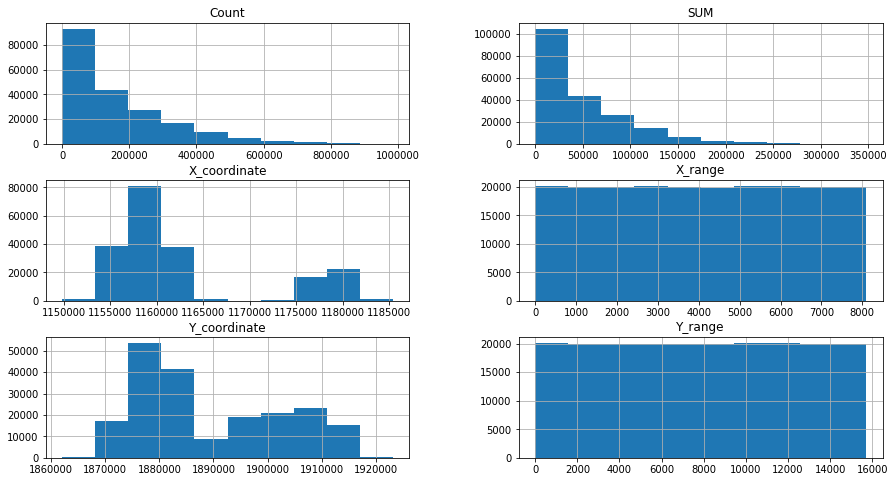

In [76]:
fig, ax = plt.subplots(figsize = (15, 8))
dt.hist(ax = ax)
plt.show()

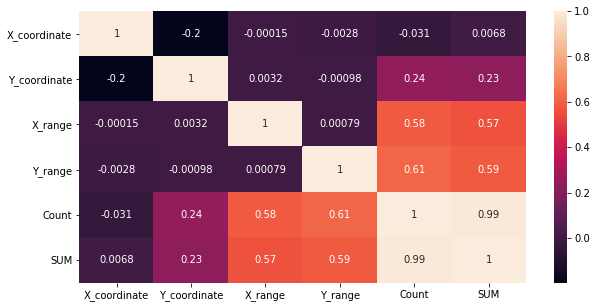

In [77]:
fig, ax = plt.subplots(figsize = (10, 5))
cor = dt.corr()
ax = sb.heatmap(cor, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [16]:
sample = dt.sample(frac = 0.05, random_state = 0)

In [17]:
sample.shape

(10000, 6)

# Applying Kmeans Clustering on Range Queries Aggregates

In [19]:
wcss = [ ]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(sample.values)
    wcss.append(km.inertia_)

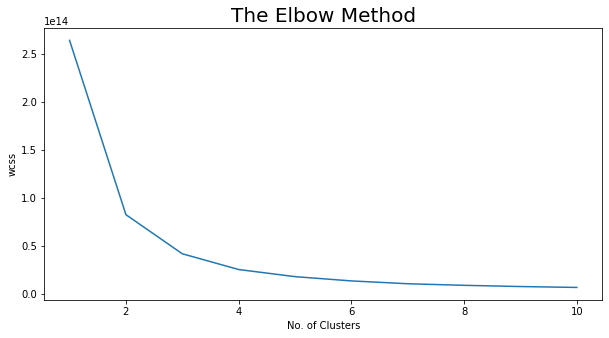

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')loaction
plt.ylabel('wcss')
plt.show()

In [25]:
km_sample = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means_sample = km_sample.fit_predict(sample.values)

In [26]:
y_means_sample

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

# Applying Hierarchical Clustering on Range Queries Aggregates

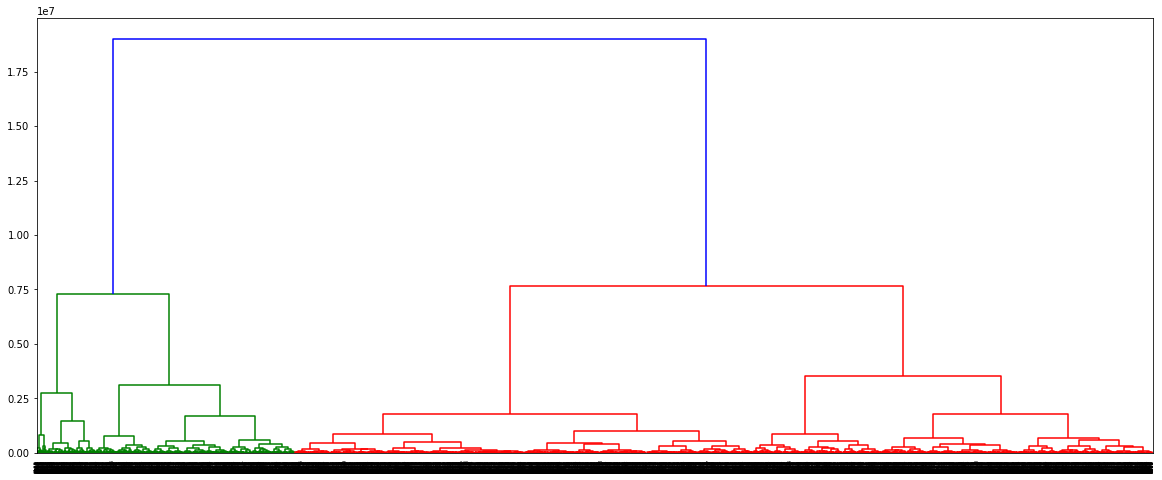

In [24]:
fig, ax = plt.subplots(figsize = (20,8))
dendrogram(linkage(sample,'ward'))
plt.show()

In [27]:
hc_sample = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc_sample = hc_sample.fit_predict(sample.values)

In [28]:
y_hc_sample

array([0, 1, 0, ..., 0, 0, 0])